# TAREA 3
Suponga que se tiene una secuencia de $n$ números enteros que es _unimodal_ , esto es, que tiene una sola moda o máximo global y que no tiene máximos locales. Por ejemplo:

<p style="text-align:center"> 12 18 23 31 37 62 <b> 78</b> 71 60 55 43 40 35 31 26 21 20 15 </p>

Más precisamente, la secuencia es estrictamente ascendente hasta llegar al máximo, y a partir de ahí es estrictamente descendente.

El objetivo de la tarea es diseñar, implementar y analizar un algoritmo eficiente para encontrar el máximo en una secuencia de este tipo.


#### EL ALGORITMO


El algoritmo se debe diseñar basado en la técnica dividir para reinar. La lógica detrás del algoritmo debe ser la  siguiente:

Supóngase que la secuencia está almacenada en un arreglo $a$, y que en un momento dado sabemos que el máximo se encuentra en el rango $a[i], ..., a[j]$, (inicialmente $i=0$ y $j=n-1$). A continuación, se calcula dos subíndices $k_{1}$, $k_{2}$ tales que $i< k_{1} < k_{2} < j$ tal que los intervalos definidos por ellos sean aproximadamente del mismo tamaño ($\frac{1}{3}$ de la distancia entre i y j). Luego, se compara $a[k1]$ con $a[k2]$ y, en base al resultado, se descarta unos de los tres tercios y se sigue buscando en los dos tercios restantes. Se repite el procedimiento anterior hasta encontrar el máximo.


Ahora, en términos generales, lo que el algoritmo implementa es dividir el arreglo en tres sub-arreglos o tres tercios de aproximadamente el mismo tamaño para así reducir el espacio de búsqueda y buscar el máximo en un espacio de búsqueda más acotado. El procedimiento se realiza hasta que el espacio de búsqueda es tan pequeño que solo contiene al máximo. En ese punto, se conoce el máximo (puesto que es el único elemento en el espacio de búsqueda)

![title](diagrama_page-0001.jpg)


Para reducir el espacio de búsqueda, primero se compara el último valor del primer sub-arreglo o primer tercio y el primer valor del tercer sub-arreglo o tercer tercio, es decir, se comparan los valores $a[k_{1}]$ y $a[k_{2}]$.

Como la secuencia es estrictamente ascendente hasta llegar al máximo, y a partir de ahí es estrictamente descendente, si se tiene que $a[k_{1}] < a[k_{2}]$, entonces se sabe que en el primer sub-arreglo no se encuentra el máximo. 

Lo anterior se debe a que, como $a[k_{1}]$ es menor que $a[k_{2}]$ y, por la estructura de la secuencia, se tiene que todos los valores anteriores a $a[k_{1}]$ son menores que $a[k_{2}]$. Así, con esta comparación, se sabe que el máximo no se encuentra en el primer sub-arreglo o primer tercio y, por lo tanto, solamente se necesita buscar el máximo en los dos sub-arreglos restantes, es decir, el máximo se encuentra en el segundo tercio o en el tercer tercio.

![title](diagrama_page-0002.jpg)


Por el otro lado, si se tiene que $a[k_{1}] > a[k_{2}]$, entonces se sabe que en el tercer sub-arreglo o tercer tercio no se encuentra el máximo. 

Lo anterior se debe a que, como $a[k_{2}]$ es menor que $a[k_{1}]$ y, por la estructura de la secuencia, se tiene que todos los valores posteriores a $a[k_{2}]$ son menores que $a[k_{1}]$. Así, con esta comparación, se sabe que el máximo no se encuentra en el tercer sub-arreglo o tercer tercio y, por lo tanto, solamente se necesita buscar el máximo en los dos sub-arreglos restantes, es decir, el máximo se encuentra en el primer tercio o en el segundo tercio.

![title](diagrama_page-0003.jpg)

Finalmente, si se cumple que $a[k_{1}] = a[k_{2}]$, significa que el espacio de búsqueda contiene solo un elemento, es decir, contiene solamente al máximo.

Lo anterior es debido a que, como la secuencia es estrictamente ascendente hasta llegar al máximo, y a partir de ahí es estrictamente descendente, se tiene que $a[k_{1}] = a[k_{2}] \Rightarrow k_{1} = k_{2}$. Luego, como se dividió el arreglo en tres sub-arreglos y $k_{1} = k_{2}$, se tiene que los tres sub-arreglos son iguales, es decir, los tres contienen el mismo elemento y este mismo elemento es el máximo del arreglo completo.

Ahora, más específicamente, en términos de implementacion, el procedimiento es el siguiente:

<ol>
    <li> Se tiene una secuencia $a_{1}, ..., a_{n}$ que cumple con la estructura mencionada, es decir, la secuencia es estrictamente ascendente hasta llegar al máximo, y a partir de ahí es estrictamente descendente.
</li>
    <br>
    <li> Inicialmente, se escoge $i=1$ y $j = n$ </li>
    <br>
    <li> Dados $i$ y $j$, se define:
        <ul>
            <li>$k_{1} = i +  \left \lfloor{\frac{j-i}{3}} \right \rfloor $</li>
            <li>$k_{2} = j - \left \lfloor{\frac{j-i}{3}} \right \rfloor $ </li>
         Nótese que, dada las definiciones de $k_{1}$ y $k_{2}$, se tiene que de $i$ a $k_{1}$ hay aproximadamente $\frac{1}{3}$ de la distancia entre $i$ y $j$. Del mismo modo, de $k_{2}$ a $j$ hay aproximadamente la distancia entre $i$ y $j$.
        </ul> 
    </li>
    <br>
    <li> Se obtienen los valores $a[k_{1}]$ y $a[k_{2}]$ y se comparan. Nótese que existen 3 casos:
        <ul>
            <li> $a[k_{1}] < a[k_{2}] $: como la secuencia tiene la estructura mencionada, se tiene que $\forall k$, $k < k_{1}$, $a[k]  < a[k_{1}] < a[k_{2}]$. Como se está buscando un máximo, se puede descartar los valores comprendidos entre $a[i]$ y $a[k_{1}]$. Así, se redefine $i = k_{1} + 1$ y se vuelve al punto 3 para seguir buscando el máximo. </li>
            <li> $a[k_{2}] < a[k_{1}] $: como la secuencia tiene la estructura mencionada, se tiene que $\forall k$, $k > k_{2}$, $a[k]  < a[k_{2}] < a[k_{1}]$. Como se está buscando un máximo, se puede descartar los valores comprendidos entre $a[k_{2}]$ y $a[j]$. Así, se redefine $j = k_{2} - 1$ y se vuelve al punto 3 para seguir buscando el máximo.</li>
            <li> $a[k_{1}] = a[k_{1}]$: como la secuencia es estrictamente creciente o estrictamente decreciente, se tiene que si $a_[k_{1}] = a_[k_{2}] \Rightarrow k_{1} = k_{2}$. Así, se tiene que el máximo global es $a[k_{1}]$  y se termina el procedimiento de búsqueda.</li>
        </ul>
    </li>
    </ol>
            
            
            
            





#### EL CÓDIGO

La implementación del algoritmo explicada anteriormente es la siguiente:

In [39]:
def moda(a):
    i = 0
    j = len(a)-1

    while True:
        k1 = i + (j-i)//3
        k2 = j - (j-i)//3
        
        if a[k1] < a[k2]:
            i = k1 + 1
            
        elif a[k1] > a[k2]:
            j = k2 - 1
            
        else:
            return a[k1]


La lógica del código es la siguiente:

1- Se define un función _moda(a)_ que recibe como parámetro el arreglo _a_ que contiene a la secuencia. Inicialmente, se define _i = 0_ y _j = len(a)-1_
```python
def moda(a):
    i = 0
    j = len(a)-1
```
2- Se entra a un ciclo while y se define $k_{1}$ y $k_{2}$ (dependiendo de los valores de _i_ y _j_)

```python
    while True:
        k1 = i + (j-i)//3
        k2 = j - (j-i)//3
```

3- Se compara $a[k_{1}]$ y $a[k_{1}]$. Si se tiene que $a[k_{1}] < a[k_{2}]$, entonces se redefine el valor de _i_ y se vuelve a entrar al ciclo while
```python
        if a[k1] < a[k2]:
            i = k1 + 1
```

4- Por el otro lado, si se tiene que $a[k_{1}] >a [k_{2}]$, entonces se redefine el valor de _j_ y se vuelve a entrar al ciclo while.
```python      
        elif a[k1] > a[k2]:
            j = k2 - 1
            
```
5- Finalmente, si no se cumple que $a[k_{1}] >a [k_{2}]$ y $a[k_{1}] < a[k_{2}]$, entonces se tiene que $a[k_{1}] = a[k_{2}]$. Luego, el máximo del arreglo viene dado por $a[k_{1}] = a[k_{2}]$ y, por lo tanto, se retorna el valor máximo y se termina la función.
```python
        else:
            return a[k1]
```

Para verificar el algoritmo, se probaron los siguientes ejemplos:

In [40]:
import numpy as np

a = np.array([10,74,56,22])
b = np.array([10,45,20])
c = np.array([23,76])
d = np.array([42])
e = np.array([12, 18, 23, 31, 37, 62, 78, 71, 60, 55, 43, 40, 35, 31, 26, 21, 20, 15 ])
f = np.array([10,9,8,7,6,5,4,3,2,1])

lista = [a,b,c,d,e,f]
for prueba in lista:
    print(moda(prueba))

74
45
76
42
78
10


#### ANÁLISIS

Respecto a el tiempo de ejecución del algoritmo, se puede definir $T(n)$ como el tiempo de ejecución para una secuencia de largo $n$ de la siguiente forma:

$$ T(n) = T \left( \frac{2n}{3} \right) + 1$$

Es decir, el tiempo de solución para una secuencia de largo $n$ depende del tiempo de solución para una sub-secuencia de tamaño $\frac{2n}{3}$ más un valor constante $1$ asociado a realizar las comparaciones respectivas entre $a[k_{1}]$ y $a[k_{2}]$.

Ahora, dado la función $T(n)$, ¿cuál es el tiempo de ejecución explícito?. Recordando el teorema maestro se tiene que:

Sea  $T(n)=pT(\frac{n}{q})+Cn^r$, por teorema maestro se tiene que:

$$
T(n) =
\begin{cases}
\Theta(n^r) & \text{ si } p<q^r\\
\Theta(n^r \log{n}) & \text{ si } p=q^r\\
\Theta(n^{\log_q{p}}) & \text{ si } p>q^r
\end{cases}
$$

Para el caso de nuestra función, se tiene que $p=1$, $q = \frac{3}{2}$ y $r=0$, luego $p=q^r$. Así, para $T(n) = T \left( \frac{2n}{3} \right) + C$, se tiene que:

$$ T(n) = \Theta(\log{n})$$

Nótese que lo anterior es una estimación ya que, en estricto rigor, por como se definió el algoritmo, la función $T(n)$ viene definido por:

$$ T(n) = T \left( n - \left \lceil{\frac{n}{3}} \right \rceil \right) + 1$$

Ahora, cuando $n=3^k$, se tiene que:

$$ T(3^k) = T \left( 3^k - \left \lceil{\frac{3^k}{3}} \right \rceil \right) + 1$$

Notando que $ \left \lceil{\frac{3^k}{3}} \right \rceil = 3^{k-1}$
$$T(3^k) = T( 3^k - 3^{k-1}) + 1$$

Desarrollando la expresión:

$$ T(3^k) = T(3^{k-1}(3-1)) + 1$$

$$ T(3^k) = T(3^{k-1}\cdot 2) + 1$$

$$ T(3^k) = T \left( 3^{k-1}\cdot \frac{3 \cdot 2}{3} \right) + 1$$

$$ T(3^k) = T \left( 3^{k} \cdot \frac{2}{3} \right) + 1$$

$$T(n) = T \left( \frac{2}{3} n \right) + 1$$

Lo cual es la expresión ocupada inicialmente. 

Ahora, gustaría conocer con más exactitud el valor de $T(n)$. Hasta ahora, se sabe que $ T(n) = \Theta(\log{n})$. Nuevamente, por facilidad, se ocupará la función $T(n) = T \left( \frac{2}{3} n \right) + 1$. Nótese que:

$$T(n) = T \left( \frac{2}{3} n \right) + 1$$
$$T(n) = T \left( \frac{2}{3} \left( \frac{2}{3} n \right) \right) + 1 + 1$$
$$.$$
$$.$$
$$.$$
$$T(n) = T \left( \left( \frac{2}{3} \right)^k \cdot n \right) + k$$

Tal que $ \left( \frac{2}{3} \right)^k \cdot n = 1$, puesto que para cualquier $n$, la función termina cuando $n=1$, es decir, el arreglo contiene solo al máximo. De esa forma, se tiene que:

$$T(n) = T (1) + k$$

Definiendo el caso base $T(1)=0$, se tiene que:

$$T(n) = k$$

Recordando que:
$$ \left( \frac{2}{3} \right)^k \cdot n = 1$$

Se tiene que:
$$ k = \log_{\frac{3}{2}} (n)$$

Así se tiene que:
$$T(n) = \log_{\frac{3}{2}}(n)$$

Esta nueva aproximación es mucho más precisa que $ T(n) = \Theta(\log{n})$ pero, de igual forma, sigue siendo una aproximación ya que se asume que $T(n) = T \left( \frac{2}{3} n \right) + 1$ y no se utiliza $ T(n) = T \left( n - \left \lceil{\frac{n}{3}} \right \rceil \right) + 1$. Del mismo modo, para la función $ T(n) = T \left( n - \left \lceil{\frac{n}{3}} \right \rceil \right) + 1$, se tiene que $T(1) = 1$.

Resolver la ecuación $ T(n) = T \left( n - \left \lceil{\frac{n}{3}} \right \rceil \right) + 1$ es complicado y, por lo tanto, se utilizarán métodos experimentales para estimar su valor.

Primeramente, se definirán las funciones $T_{1}(n)$ y $T_{2}(n)$ tales que:

$$ T_{1}(n) = T \left( n - \left \lceil{\frac{n}{3}} \right \rceil \right) + 1 $$

$$T_{2}(n) = \log_{\frac{3}{2}}(n) $$

Luego, se graficarán las funciones $T_{1}(n)$ y $T_{2}(n)$ para distintos valores de $n$ para así estudiar la función $ T_{1}(n) = T \left( n - \left \lceil{\frac{n}{3}} \right \rceil \right) + 1 $ y analizar su comportamiento y peores casos.

El siguiente código implemente lo mencionado anteriormente.


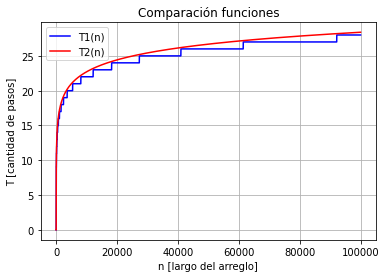

In [41]:
import matplotlib.pyplot as plt

def t1(n):
    if n==1:
        return 1
    else:
        a = n//3
        if n%3!=0:
            a+=1
        return t1(n-a) + 1

def t2(n):
    return np.log(n)/np.log(1.5)

n = np.arange(100001)
t_1 = np.zeros(100001)
t_2 = np.zeros(100001)

for i in range(1,100001):
    t_1[i] = t1(i)
    t_2[i] = t2(i)

plt.plot(n,t_1, 'b-', label = "T1(n)")
plt.plot(n,t_2, 'r-', label = "T2(n)")
plt.title("Comparación funciones")
plt.xlabel("n [largo del arreglo]")
plt.ylabel("T [cantidad de pasos]")
plt.legend()
plt.grid(True)

plt.show()

Más específicamente, el programa anterior realizar lo siguiente:

1- Se importa la librería para plotear gráficos, y se definen las funciones $T_{1}(n)$ y $T_{2}(n)$. Nótese que para la función $T_{2}(n) = \log_{\frac{3}{2}}(n) $, se utiliza la propiedad del cambio de base:
$$\log_{a}(b) = \frac{ \log_{c}(b)}{\log_{c}(a)}$$. 
```python
import matplotlib.pyplot as plt

def t1(n):
    if n==1:
        return 1
    else:
        a = n//3
        if n%3!=0:
            a+=1
        return t1(n-a) + 1

def t2(n):
    return np.log(n)/np.log(1.5)
```
2- Se define la cantidad de $n$ a evaluar y los arreglos para almacenar los valores de $T_{1}(n)$ y $T_{2}(n)$. Luego, para cada valor de $n$, se calcula $T_{1}(n)$ y $T_{2}(n)$ y se guardan los valores en los respectivos arreglos.

```python
n = np.arange(100001)
t_1 = np.zeros(100001)
t_2 = np.zeros(100001)

for i in range(1,100001):
    t_1[i] = t1(i)
    t_2[i] = t2(i)
```

3- Con la información obtenida, se grafican dos funciones: los valores de $T_{1}(n)$ respecto a $n$ y los valores de $T_{2}(n)$ respecto a $n$. A cada función se le asigna un color y se establecen propiedades del gráficos como título, nombres de los ejes, etcétera.

```python 
plt.plot(n,t_1, 'b-', label = "T1(n)")
plt.plot(n,t_2, 'r-', label = "T2(n)")
plt.title("Comparación funciones")
plt.xlabel("n [largo del arreglo]")
plt.ylabel("T [cantidad de pasos]")
plt.legend()
plt.grid(True)

plt.show()
```

Ahora, respecto a las funciones, lo más restacable es que la función $T_{2}(n)$ se asimila bastante a la función $T_{1}(n)$. Del mismo modo, la función $ T_{1}(n) = T \left( n - \left \lceil{\frac{n}{3}} \right \rceil \right) + 1 $ presenta un crecimiento logarítmico en base $\frac{3}{2}$. Así, $T_{2}(n) = \log_{\frac{3}{2}}(n) $ es una buena estimación para la solucion de la función $ T_{1}(n) = T \left( n - \left \lceil{\frac{n}{3}} \right \rceil \right) + 1 $. 

Por lo tanto, finalmente, el tiempo de solución óptimo para el problema de buscar el máximo en una secuencia de $n$ números enteros que es unimodal está dado, aproximadamente, por la función $T(n) = \log_{\frac{3}{2}} (n)$.


#### CONCLUSIONES
Muchas veces, tiempos de ejecución de algoritmos asociados a funciones de tiempos de ejecución de la forma $T(n)=pT(\frac{n}{q})+Cn^r$, son difíciles de calcular y el teorema maestro permite una primera aproximación al crecimiento en el tiempo de ejecución de estos algoritmo. Del mismo modo, aproximaciones y suposiciones sobre la función $T(n)$ permiten encontrar soluciones aproximadas a la solución real, otorgando la posibilidad de modelar de manera muy aproximada el comportamiento de un algoritmo y así entender su funcionamiento.

En ese sentido, en la presente tarea, con un problema de ejemplo, se utilizó el teorema maestro para tener un primer acercamiento al comportamiento del algoritmo que solucionaba el problema de ejemplo. Asimismo, con un par de aproximaciones y suposiciones, se encontró una solución aproximada a la solución real, permitiendo tener una mejor compresión y entendimiento del funcionamiento del algoritmo.
